c:\Users\Tyreek ALEXANDER\OneDrive - Texas Tech University\Courses\ML_Classifiers\preprocessing.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CryoSleep=raw_data.CryoSleep.fillna(random.choice([True,False])),
c:\Users\Tyreek ALEXANDER\OneDrive - Texas Tech University\Courses\ML_Classifiers\preprocessing.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  VIP=raw_data.VIP.fillna(random.choice([True,False])),
c:\Users\Tyreek ALEXANDER\OneDrive - Texas Tech University\Courses\ML_Classifiers\preprocessing.py:18: FutureWarning: Downcasting object dtype

ValueError: x and y must be the same size

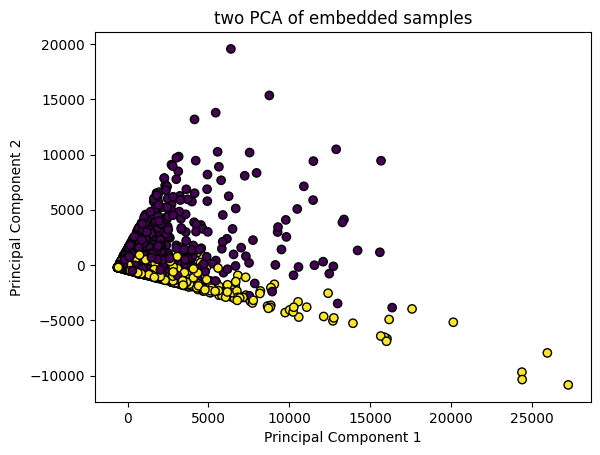

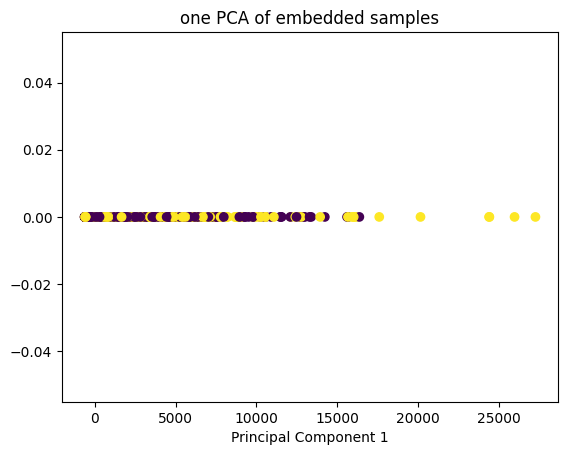

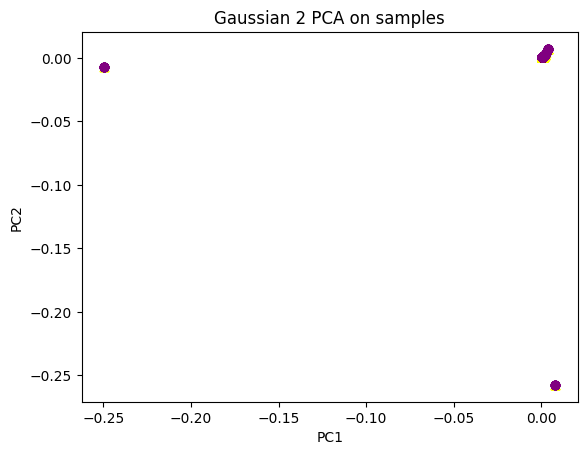

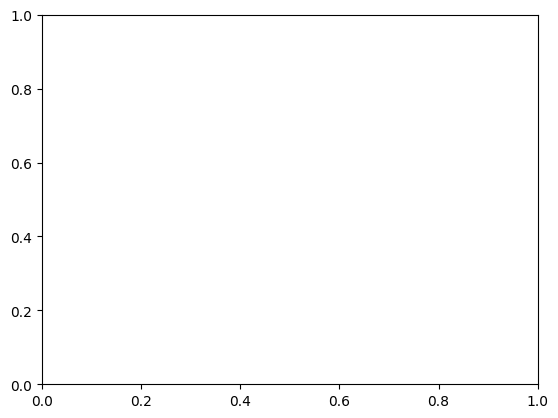

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import preprocessing

Xtrain=preprocessing.kag_X_train
Xtest=preprocessing.kag_X_test
ytrain=preprocessing.kag_y_train
ytest=preprocessing.kag_y_test

class1=Xtrain[ytrain==1]
class2=Xtrain[ytrain==0]


# Apply PCA with two components (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xtrain)
 
# Plot the results
fig4 = plt.figure()
ax4  = fig4.add_subplot()

ax4.scatter(X_pca[:, 0], X_pca[:, 1], c=ytrain, cmap='viridis', edgecolor='k')
ax4.set_title('two PCA of embedded samples')
ax4.set_xlabel('Principal Component 1')
ax4.set_ylabel('Principal Component 2')

# Apply PCA with one components (visualization)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(Xtrain)
 
# Plot the results
fig5 = plt.figure()
ax5  = fig5.add_subplot()

ax5.scatter(X_pca[:, 0], np.zeros(len(X_pca[:, 0])) ,c=ytrain )
ax5.set_title('one PCA of embedded samples')
ax5.set_xlabel('Principal Component 1')


def gaus_kpca(X, gamma, n_components):

    # Computes the squared Euclidean distance between the points in the matrix.
    # Converting the pairwise distances into a symmetric matrix.
    mat_sq_dists = squareform(pdist(X, 'sqeuclidean'))

    # Computing the MxM kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
   
    eigvals, eigvecs = eigh(K)

    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    

    # Collect the top k eigenvectors (projected examples)

    X_pc = np.column_stack([eigvecs[:, i]for i in range(n_components)]) 
    return X_pc

X, y = Xtrain, ytrain

X_pc = gaus_kpca(Xtrain, gamma=14, n_components=1)
fig7 = plt.figure()
ax7  = fig7.add_subplot()

X_kpca = gaus_kpca(X, gamma=15, n_components=2)
ax7.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='yellow', marker='^')
ax7.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='purple', marker='o')
ax7.set_xlabel('PC1')
ax7.set_ylabel('PC2')
ax7.set_title('Gaussian 2 PCA on samples')

fig8 = plt.figure()
ax8  = fig8.add_subplot()

ax8.scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='yellow', marker='^')
ax8.scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='purple', marker='o')
ax8.set_ylim(-2,4)
ax8.set_xlabel('PC1')
ax8.set_title('Gaussian 1 PCA on samples')

plt.show()